In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
train_data = pd.read_csv('train.csv')

In [4]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Exploratory Data Analysis

In [6]:
# 1. Give missing column names - OK
# cols = ['col1', 'col2', 'col3', ...]
# auto.columns = cols

In [7]:
# 2. Check missing values
# 2a. Check for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# 2b. Check for data type for each column. Data that should be in the form of integer but shown as string (object) should be observed.
# Check for wrong entries: -, ?, #, *, etc
# for col in train_data.columns:
#     print(f'{col}: {train_data[col].unique()}')
# If there's any weird symbol, replace with np.nan
# for col in train_data.columns:
#     train_data[col].replace({'?': np.nan}, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# 2c. Check for missing values (again)
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# 3. Categories
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
# Survived
train_data['Survived'].value_counts().to_dict()

{0: 549, 1: 342}

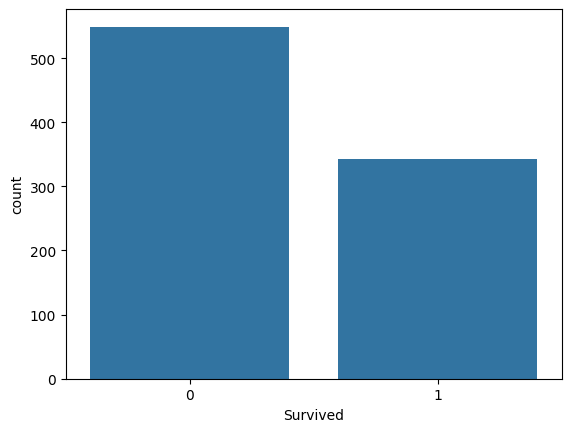

In [12]:
sns.countplot(data=train_data, x='Survived')
plt.show()

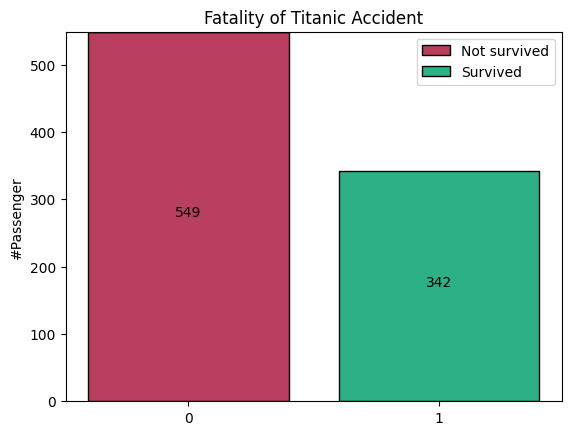

In [13]:
# Survived
groups = list(train_data['Survived'].unique())
groups.sort()

survive_status = list(train_data['Survived'].unique())
survive_status.sort()

values = []
for s in survive_status:
    values_s = []
    for g in groups:
        values_s.append(len(train_data[(train_data['Survived'] == g) & (train_data['Survived'] == s)]))
    values.append(values_s)

fig, ax = plt.subplots()

# Stacked bar chart with loop
colors = ['#B8405E', '#2EB086']
labels = ['Not survived', 'Survived']
for i in range(len(survive_status)):
    ax.bar(groups, values[i], color = colors[i], edgecolor = 'black', linewidth = 1, label = labels[i], bottom = np.sum(values[:i], axis = 0))

# Sum of values
total_values = np.sum(values, axis=0)

# Total values labels
for i, total in enumerate(total_values):
  ax.text(i, total / 2, round(total),
          ha = 'center', color = 'black')

# Additional
ax.legend()
ax.set_ylabel('#Passenger')
plt.title('Fatality of Titanic Accident')
plt.xticks(groups)
plt.show()

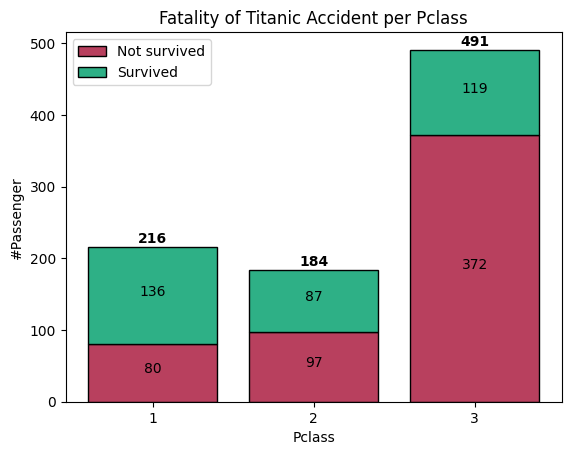

In [14]:
# Pclass
groups = list(train_data['Pclass'].unique())
groups.sort()

survive_status = list(train_data['Survived'].unique())
survive_status.sort()

values = []
for s in survive_status:
    values_s = []
    for g in groups:
        values_s.append(len(train_data[(train_data['Pclass'] == g) & (train_data['Survived'] == s)]))
    values.append(values_s)

fig, ax = plt.subplots()

# Stacked bar chart with loop
colors = ['#B8405E', '#2EB086']
labels = ['Not survived', 'Survived']
for i in range(len(survive_status)):
    ax.bar(groups, values[i], color = colors[i], edgecolor = 'black', linewidth = 1, label = labels[i], bottom = np.sum(values[:i], axis = 0))

# Labels
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'black', size = 10)

# Sum of values
total_values = np.sum(values, axis=0)

# Total values labels
for i, total in enumerate(total_values):
  ax.text(i+1, total + 5, round(total),
          ha = 'center', weight = 'bold', color = 'black')

# Additional
ax.legend()
ax.set_ylabel('#Passenger')
ax.set_xlabel('Pclass')
plt.title('Fatality of Titanic Accident per Pclass')
plt.xticks(groups)
plt.show()

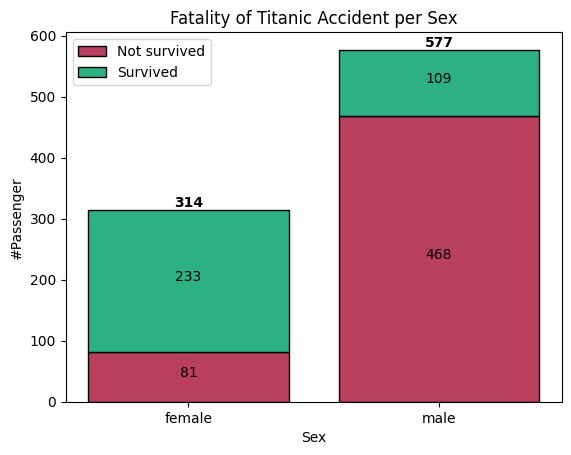

In [15]:
# Sex
groups = list(train_data['Sex'].unique())
groups.sort()

survive_status = list(train_data['Survived'].unique())
survive_status.sort()

values = []
for s in survive_status:
    values_s = []
    for g in groups:
        values_s.append(len(train_data[(train_data['Sex'] == g) & (train_data['Survived'] == s)]))
    values.append(values_s)

fig, ax = plt.subplots()

# Stacked bar chart with loop
colors = ['#B8405E', '#2EB086']
labels = ['Not survived', 'Survived']
for i in range(len(survive_status)):
    ax.bar(groups, values[i], color = colors[i], edgecolor = 'black', linewidth = 1, label = labels[i], bottom = np.sum(values[:i], axis = 0))

# Labels
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'black', size = 10)

# Sum of values
total_values = np.sum(values, axis=0)

# Total values labels
for i, total in enumerate(total_values):
  ax.text(i, total + 5, round(total),
          ha = 'center', weight = 'bold', color = 'black')

# Additional
ax.legend()
ax.set_ylabel('#Passenger')
plt.title('Fatality of Titanic Accident per Sex')
ax.set_xlabel('Sex')
plt.xticks(groups)
plt.show()

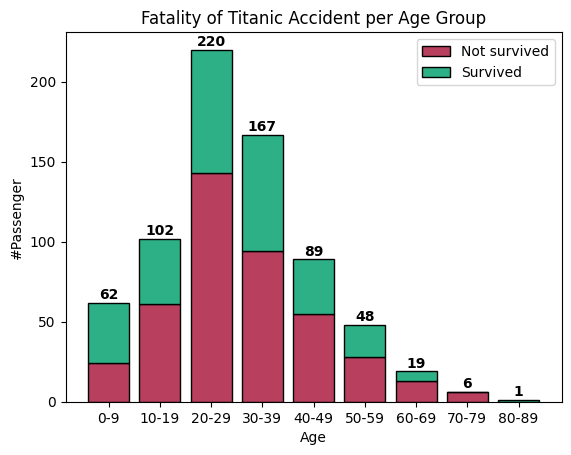

In [16]:
# Age
max_age = train_data['Age'].max()
nr_bin = 8
bin_size = math.ceil(max_age/nr_bin)
groups_dict = {}

lower_bound = 0
for i in range(nr_bin + 1):
    upper_bound = lower_bound + bin_size - 1
    df_in_range = train_data[(train_data['Age'] >= lower_bound) & (train_data['Age'] <= upper_bound)]
    df_in_range_not_survived = df_in_range[df_in_range['Survived'] == 0]
    df_in_range_survived = df_in_range[df_in_range['Survived'] == 1]
    groups_dict[f'{lower_bound}-{upper_bound}'] = [len(df_in_range_not_survived), len(df_in_range_survived)]
    lower_bound = upper_bound + 1

groups = list(groups_dict.keys())

survive_status = list(train_data['Survived'].unique())
survive_status.sort()

values = []
for s in survive_status:
    values_s = []
    for g in groups:
        values_s.append(groups_dict[g][s])
    values.append(values_s)

fig, ax = plt.subplots()

# Stacked bar chart with loop
colors = ['#B8405E', '#2EB086']
labels = ['Not survived', 'Survived']
for i in range(len(survive_status)):
    ax.bar(groups, values[i], color = colors[i], edgecolor = 'black', linewidth = 1, label = labels[i], bottom = np.sum(values[:i], axis = 0))

# Sum of values
total_values = np.sum(values, axis=0)

# Total values labels
for i, total in enumerate(total_values):
  ax.text(i, total + 2.5, round(total),
          ha = 'center', weight = 'bold', color = 'black')

# Additional
ax.legend()
ax.set_ylabel('#Passenger')
ax.set_xlabel('Age')
plt.title('Fatality of Titanic Accident per Age Group')
plt.xticks(groups)
plt.show()

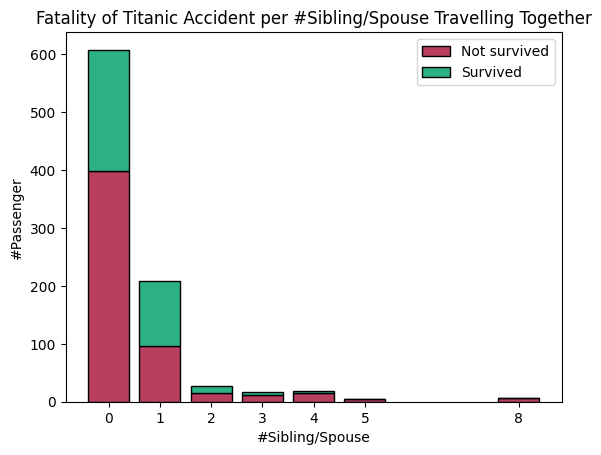

In [17]:
# SibSp
groups = list(train_data['SibSp'].unique())
groups.sort()

survive_status = list(train_data['Survived'].unique())
survive_status.sort()

values = []
for s in survive_status:
    values_s = []
    for g in groups:
        values_s.append(len(train_data[(train_data['SibSp'] == g) & (train_data['Survived'] == s)]))
    values.append(values_s)

fig, ax = plt.subplots()

# Stacked bar chart with loop
colors = ['#B8405E', '#2EB086']
labels = ['Not survived', 'Survived']
for i in range(len(survive_status)):
    ax.bar(groups, values[i], color = colors[i], edgecolor = 'black', linewidth = 1, label = labels[i], bottom = np.sum(values[:i], axis = 0))

# Additional
ax.legend()
ax.set_ylabel('#Passenger')
ax.set_xlabel('#Sibling/Spouse')
plt.title('Fatality of Titanic Accident per #Sibling/Spouse Travelling Together')
plt.xticks(groups)
plt.show()

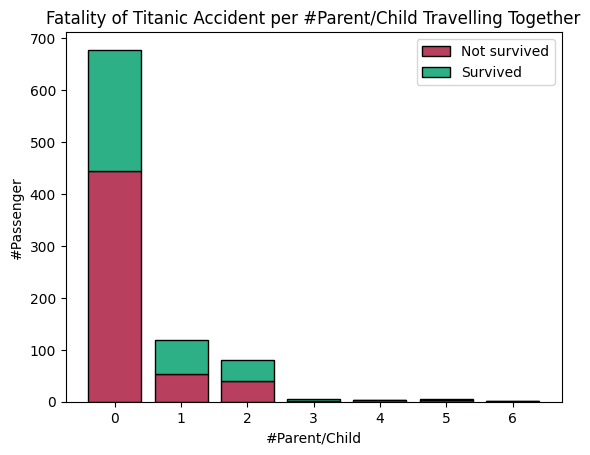

In [18]:
# Parch
groups = list(train_data['Parch'].unique())
groups.sort()

survive_status = list(train_data['Survived'].unique())
survive_status.sort()

values = []
for s in survive_status:
    values_s = []
    for g in groups:
        values_s.append(len(train_data[(train_data['Parch'] == g) & (train_data['Survived'] == s)]))
    values.append(values_s)

fig, ax = plt.subplots()

# Stacked bar chart with loop
colors = ['#B8405E', '#2EB086']
labels = ['Not survived', 'Survived']
for i in range(len(survive_status)):
    ax.bar(groups, values[i], color = colors[i], edgecolor = 'black', linewidth = 1, label = labels[i], bottom = np.sum(values[:i], axis = 0))

# Additional
ax.legend()
ax.set_ylabel('#Passenger')
ax.set_xlabel('#Parent/Child')
plt.title('Fatality of Titanic Accident per #Parent/Child Travelling Together')
plt.xticks(groups)
plt.show()

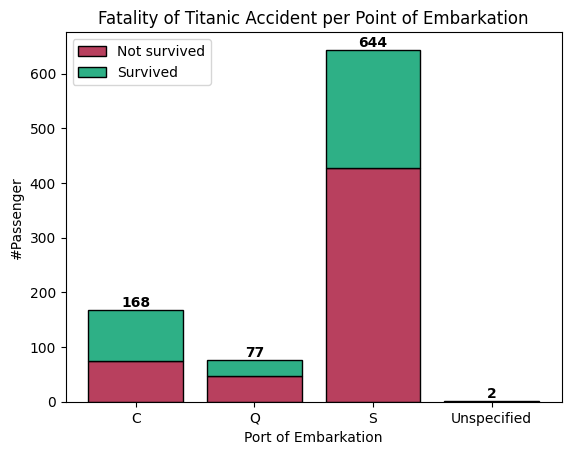

In [19]:
# Embarked
groups = list(train_data['Embarked'].fillna('Unspecified').unique())
groups.sort()

survive_status = list(train_data['Survived'].unique())
survive_status.sort()

values = []
for s in survive_status:
    values_s = []
    for g in groups:
        values_s.append(len(train_data[(train_data['Embarked'].fillna('Unspecified') == g) & (train_data['Survived'] == s)]))
    values.append(values_s)

fig, ax = plt.subplots()

# Stacked bar chart with loop
colors = ['#B8405E', '#2EB086']
labels = ['Not survived', 'Survived']
for i in range(len(survive_status)):
    ax.bar(groups, values[i], color = colors[i], edgecolor = 'black', linewidth = 1, label = labels[i], bottom = np.sum(values[:i], axis = 0))

# Sum of values
total_values = np.sum(values, axis=0)

# Total values labels
for i, total in enumerate(total_values):
  ax.text(i, total + 5, round(total),
          ha = 'center', weight = 'bold', color = 'black')

# Additional
ax.legend()
ax.set_ylabel('#Passenger')
ax.set_xlabel('Port of Embarkation')
plt.title('Fatality of Titanic Accident per Point of Embarkation')
plt.xticks(groups)
plt.show()

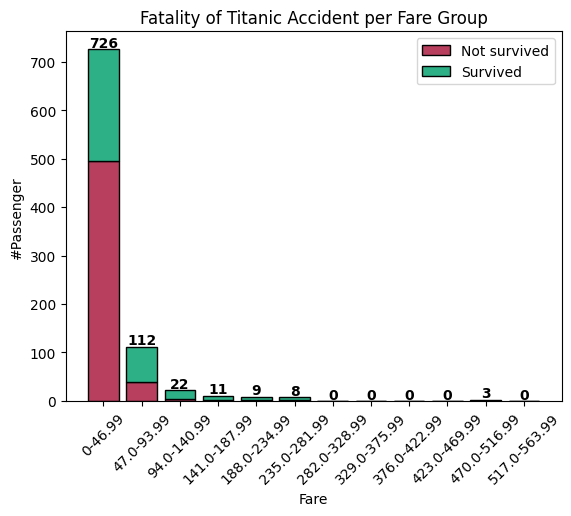

In [20]:
# Fare
max_fare = train_data['Fare'].max()
nr_bin = 11
bin_size = math.ceil(max_fare/nr_bin)
groups_dict = {}
lower_bound = 0
for i in range(nr_bin + 1):
    upper_bound = lower_bound + bin_size - 0.01
    df_in_range = train_data[(train_data['Fare'] >= lower_bound) & (train_data['Fare'] <= upper_bound)]
    df_in_range_not_survived = df_in_range[df_in_range['Survived'] == 0]
    df_in_range_survived = df_in_range[df_in_range['Survived'] == 1]
    groups_dict[f'{lower_bound}-{upper_bound}'] = [len(df_in_range_not_survived), len(df_in_range_survived)]
    lower_bound = upper_bound + 0.01

groups = list(groups_dict.keys())

survive_status = list(train_data['Survived'].unique())
survive_status.sort()

values = []
for s in survive_status:
    values_s = []
    for g in groups:
        values_s.append(groups_dict[g][s])
    values.append(values_s)

fig, ax = plt.subplots()

# Stacked bar chart with loop
colors = ['#B8405E', '#2EB086']
labels = ['Not survived', 'Survived']
for i in range(len(survive_status)):
    ax.bar(groups, values[i], color = colors[i], edgecolor = 'black', linewidth = 1, label = labels[i], bottom = np.sum(values[:i], axis = 0))

# Sum of values
total_values = np.sum(values, axis=0)

# Total values labels
for i, total in enumerate(total_values):
  ax.text(i, total + 5, round(total),
          ha = 'center', weight = 'bold', color = 'black')

# Additional
ax.legend()
ax.set_ylabel('#Passenger')
ax.set_xlabel('Fare')
plt.title('Fatality of Titanic Accident per Fare Group')
plt.xticks(groups, rotation=45)
plt.show()

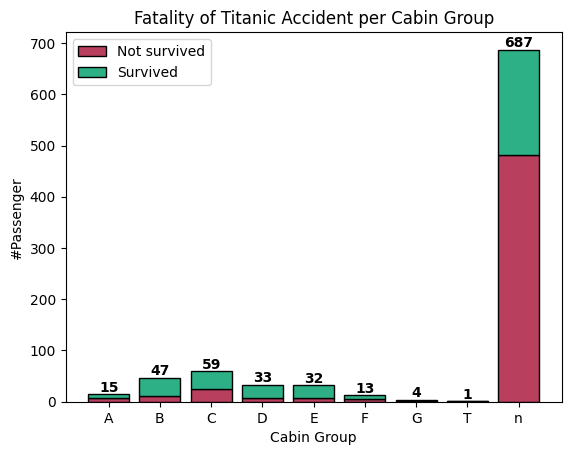

In [21]:
# Cabin
train_data['CabinGroup'] = train_data['Cabin'].astype(str).str[0]
groups = list(train_data['CabinGroup'].unique())
groups.sort()

survive_status = list(train_data['Survived'].unique())
survive_status.sort()

values = []
for s in survive_status:
    values_s = []
    for g in groups:
        values_s.append(len(train_data[(train_data['CabinGroup'].fillna('Unspecified') == g) & (train_data['Survived'] == s)]))
    values.append(values_s)

fig, ax = plt.subplots()

# Stacked bar chart with loop
colors = ['#B8405E', '#2EB086']
labels = ['Not survived', 'Survived']
for i in range(len(survive_status)):
    ax.bar(groups, values[i], color = colors[i], edgecolor = 'black', linewidth = 1, label = labels[i], bottom = np.sum(values[:i], axis = 0))

# Sum of values
total_values = np.sum(values, axis=0)

# Total values labels
for i, total in enumerate(total_values):
  ax.text(i, total + 5, round(total),
          ha = 'center', weight = 'bold', color = 'black')

# Additional
ax.legend()
ax.set_ylabel('#Passenger')
ax.set_xlabel('Cabin Group')
plt.title('Fatality of Titanic Accident per Cabin Group')
plt.xticks(groups)
plt.show()

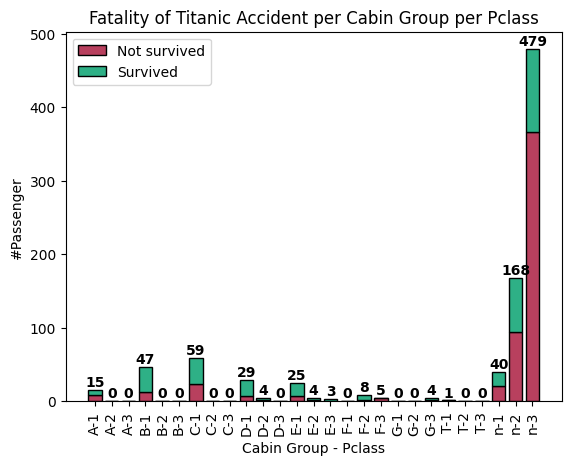

In [22]:
cabin_groups = list(train_data['CabinGroup'].unique())
cabin_groups.sort()

pclass = list(train_data['Pclass'].unique())
pclass.sort()

x_y = len(cabin_groups) * len(pclass)
cabin_groups_extended = cabin_groups * (x_y // len(cabin_groups))
cabin_groups_extended.sort()
pclass_extended = pclass * (x_y // len(pclass))

values = []
for s in survive_status:
    values_s = []
    for cabin_group in cabin_groups:
        for p in pclass:
            values_s.append(len(train_data[(train_data['CabinGroup'] == cabin_group) & (train_data['Pclass'] == p) & (train_data['Survived'] == s)]))
    values.append(values_s)

fig, ax = plt.subplots()

groups = []
for i in range(x_y):
    groups.append(f'{cabin_groups_extended[i]}-{pclass_extended[i]}')
    
# Stacked bar chart with loop
colors = ['#B8405E', '#2EB086']
labels = ['Not survived', 'Survived']
for i in range(len(survive_status)):
    ax.bar(groups, values[i], color = colors[i], edgecolor = 'black', linewidth = 1, label = labels[i], bottom = np.sum(values[:i], axis = 0))

# Sum of values
total_values = np.sum(values, axis=0)

# Total values labels
for i, total in enumerate(total_values):
  ax.text(i, total + 5, round(total),
          ha = 'center', weight = 'bold', color = 'black')

# Additional
ax.legend()
ax.set_ylabel('#Passenger')
ax.set_xlabel('Cabin Group - Pclass')
plt.title('Fatality of Titanic Accident per Cabin Group per Pclass')
plt.xticks(groups)
plt.xticks(groups, rotation=90)
plt.show()

<Axes: >

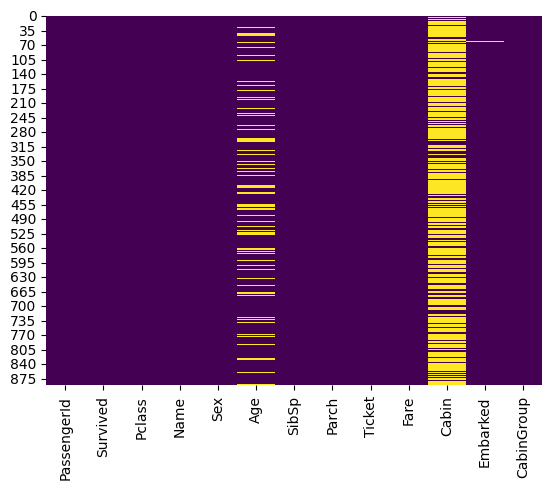

In [23]:
# 3. Handle missing values
# 3a. Visualize missing values
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')

In [24]:
# 3b. Fill in missing values
# Embarked: 2 missing values
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinGroup
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


In [25]:
# Apparently passenger 62 & 829 stay in the same room, and they have the same ticket ID.
# Look for other passengers with the same ticket -> None
train_data[train_data['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinGroup
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


In [26]:
# Look for other passengers with the same Cabin -> None
train_data[train_data['Cabin'] == 'B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinGroup
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


In [27]:
# Look for other passengers with the similar last name -> None
train_data[train_data['Name'].str.contains('Stone')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinGroup
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5,E34,C,E
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


In [28]:
# See first class passenger and see if we can deduce 'Embarked' from there -> None
train_data_firstclass = train_data[train_data['Pclass'] == 1]
train_data_firstclass_embark_s = train_data_firstclass[train_data_firstclass['Embarked'] == 'S']
train_data_firstclass_embark_c = train_data_firstclass[train_data_firstclass['Embarked'] == 'C']
train_data_firstclass_embark_q = train_data_firstclass[train_data_firstclass['Embarked'] == 'Q']
print(len(train_data_firstclass_embark_s), len(train_data_firstclass_embark_c), len(train_data_firstclass_embark_q))

127 85 2


In [29]:
# Since 60% of first class passenger embarked from S, it's safer to assume passenger 62 and 830 embarked from S
train_data['Embarked'].fillna('S', inplace = True)

In [30]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
CabinGroup       0
dtype: int64

In [31]:
# Age: 177 missing values

<Axes: xlabel='Age', ylabel='Fare'>

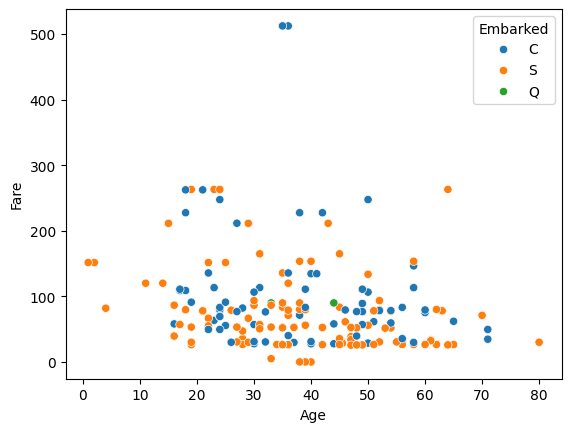

In [32]:
train_data_firstclass = train_data[train_data['Pclass'] == 1]
sns.scatterplot(data=train_data_firstclass, x='Age', y='Fare', hue='Embarked')

<Axes: xlabel='Age', ylabel='Fare'>

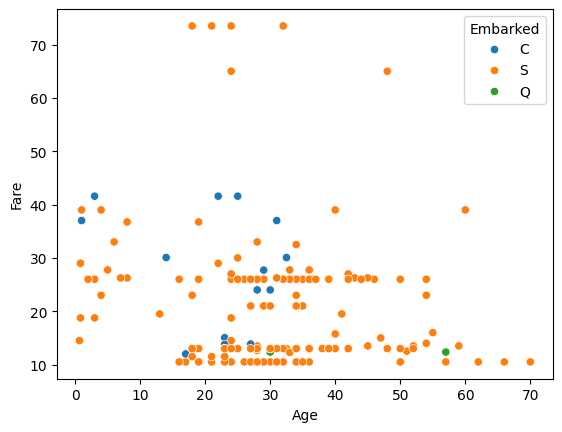

In [33]:
train_data_secondclass = train_data[train_data['Pclass'] == 2]
sns.scatterplot(data=train_data_secondclass, x='Age', y='Fare', hue='Embarked')

<Axes: xlabel='Age', ylabel='Fare'>

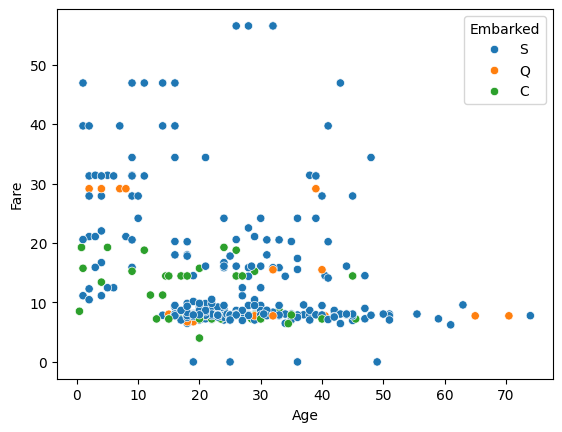

In [34]:
train_data_thirdclass = train_data[train_data['Pclass'] == 3]
sns.scatterplot(data=train_data_thirdclass, x='Age', y='Fare', hue='Embarked')

In [35]:
train_data[train_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinGroup
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,n
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,n
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,n
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,n
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,n
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,n
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,n
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,n


In [36]:
# Inspired from https://towardsdatascience.com/a-beginners-guide-to-kaggle-s-titanic-problem-3193cb56f6ca
train_data['Salutation'] = train_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [37]:
train_data.groupby(['Salutation']).agg({'Age':['count', 'mean', 'std']})

Age                      
             count       mean        std
Salutation                              
Capt             1  70.000000        NaN
Col              2  58.000000   2.828427
Don              1  40.000000        NaN
Dr               6  42.000000  12.016655
Jonkheer         1  38.000000        NaN
Lady             1  48.000000        NaN
Major            2  48.500000   4.949747
Master          36   4.574167   3.619872
Miss           146  21.773973  12.990292
Mlle             2  24.000000   0.000000
Mme              1  24.000000        NaN
Mr             398  32.368090  12.708793
Mrs            108  35.898148  11.433628
Ms               1  28.000000        NaN
Rev              6  43.166667  13.136463
Sir              1  49.000000        NaN
the Countess     1  33.000000        NaN

In [38]:
train_data[train_data['Age'].isnull()]['Salutation'].value_counts()

Salutation
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64

In [39]:
train_data['Age'] = train_data.groupby('Salutation')['Age'].transform(lambda x: x.fillna(x.mean()))

In [40]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
CabinGroup       0
Salutation       0
dtype: int64

In [41]:
# Cabin: 687 missing values
# Too many missing values: create new category for missing values

In [42]:
train_data['Cabin'].fillna('Na')

0        Na
1       C85
2        Na
3      C123
4        Na
       ... 
886      Na
887     B42
888      Na
889    C148
890      Na
Name: Cabin, Length: 891, dtype: object

In [43]:
# Feature engineering
# Drop columns: Name, Ticket, PassengerId
# Add columns: Family -> SibSp + Parch
# Convert to number: Sex, CabinGroup, Salutation
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinGroup,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n,Mr


In [44]:
train_data_clean = train_data.drop(['Name', 'Ticket', 'PassengerId', 'Cabin', 'Salutation'], axis=1)
train_data_clean['Family'] = train_data_clean['SibSp'] + train_data_clean['Parch']
train_data_clean[['CabinNumber', 'dummy']] = train_data['Cabin'].astype(str).str.split(" ", n=1, expand=True)
train_data_clean['CabinNumber'] = train_data_clean['CabinNumber'].astype(str).str[1:]
train_data_clean['CabinNumber'].replace({'an': 0.0}, inplace=True)
train_data_clean['CabinNumber'].replace({'': 0.0}, inplace=True)
train_data_clean['CabinGroup'].replace({'n': 'NaN'}, inplace=True)
train_data_clean = train_data_clean.drop(['dummy'], axis=1)
train_data_clean['CabinNumber'] = train_data_clean['CabinNumber'].astype(float)
train_data_clean.iloc[25:30]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinGroup,Family,CabinNumber
25,1,3,female,38.000000,1,5,31.3875,S,NaN,6,0.0
26,0,3,male,32.368090,0,0,7.2250,C,NaN,0,0.0
27,0,1,male,19.000000,3,2,263.0000,S,C,5,23.0
28,1,3,female,21.773973,0,0,7.8792,Q,NaN,0,0.0
29,0,3,male,32.368090,0,0,7.8958,S,NaN,0,0.0


In [45]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   CabinGroup   891 non-null    object 
 9   Family       891 non-null    int64  
 10  CabinNumber  891 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 76.7+ KB


In [46]:
train_data_clean =  pd.get_dummies(train_data_clean, drop_first=True)
train_data_clean.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,CabinNumber,Sex_male,Embarked_Q,Embarked_S,CabinGroup_B,CabinGroup_C,CabinGroup_D,CabinGroup_E,CabinGroup_F,CabinGroup_G,CabinGroup_NaN,CabinGroup_T
0,0,3,22.0,1,0,7.2500,1,0.0,True,False,True,False,False,False,False,False,False,True,False
1,1,1,38.0,1,0,71.2833,1,85.0,False,False,False,False,True,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,0,0.0,False,False,True,False,False,False,False,False,False,True,False
3,1,1,35.0,1,0,53.1000,1,123.0,False,False,True,False,True,False,False,False,False,False,False
4,0,3,35.0,0,0,8.0500,0,0.0,True,False,True,False,False,False,False,False,False,True,False


In [47]:
# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [48]:
# Make prediction with train data - LogisticRegression
start = time.time()
from sklearn.linear_model import LogisticRegression

X = train_data_clean.drop('Survived', axis=1)
y = train_data_clean['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
log_model = LogisticRegression(solver='saga', max_iter=5000)
# Parameters to try
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
C = [100, 10, 1.0, 0.1, 0.01]
grid_model_logreg = GridSearchCV(log_model, param_grid={'C': C, 'penalty': penalty})
grid_model_logreg.fit(scaled_X_train, y_train)
end = time.time()
print('duration:', end - start)

duration: 1.1831660270690918


In [49]:
grid_model_logreg.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [50]:
y_pred = grid_model_logreg.predict(scaled_X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.7888888888888889

In [52]:
cm = confusion_matrix(y_test, y_pred, labels=grid_model_logreg.classes_)

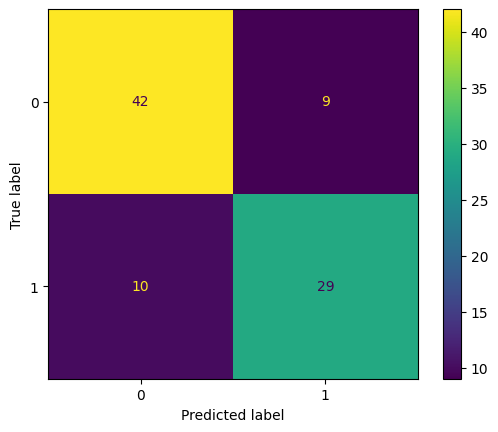

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_model_logreg.classes_)
disp.plot()
plt.show()

In [54]:
# Make prediction with train data - RidgeClassifier
start = time.time()
from sklearn.linear_model import RidgeClassifier

X = train_data_clean.drop('Survived', axis=1)
y = train_data_clean['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
ridge_model = RidgeClassifier()
# Parameters to try
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
grid_model_ridge = GridSearchCV(ridge_model, param_grid={'alpha': alpha})
grid_model_ridge.fit(scaled_X_train, y_train)
end = time.time()
print('duration:', end - start)

duration: 0.26856541633605957


In [55]:
grid_model_ridge.best_params_

{'alpha': 0.1}

In [56]:
y_pred = grid_model_ridge.predict(scaled_X_test)
accuracy_score(y_test, y_pred)

0.8777777777777778

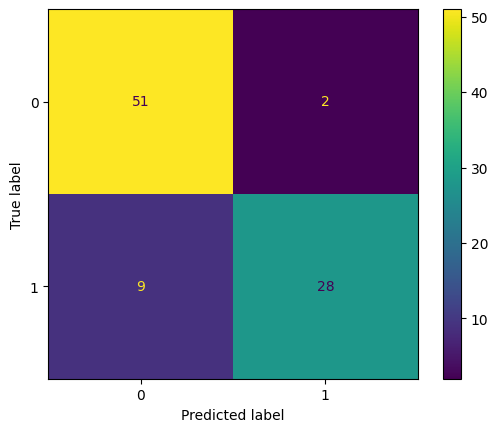

In [57]:
cm = confusion_matrix(y_test, y_pred, labels=grid_model_ridge.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_model_ridge.classes_)
disp.plot()
plt.show()

In [58]:
# Make prediction with train data - KNeighborsClassifier
start = time.time()
from sklearn.neighbors import KNeighborsClassifier

X = train_data_clean.drop('Survived', axis=1)
y = train_data_clean['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
knn_model = KNeighborsClassifier()
# Parameters to try
n_neighbors = range(1, 21, 1)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_model_knn = GridSearchCV(knn_model, param_grid=grid)
grid_model_knn.fit(scaled_X_train, y_train)
end = time.time()
print('duration:', end - start)

duration: 5.842107534408569


In [59]:
grid_model_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

In [60]:
y_pred = grid_model_knn.predict(scaled_X_test)
accuracy_score(y_test, y_pred)

0.8333333333333334

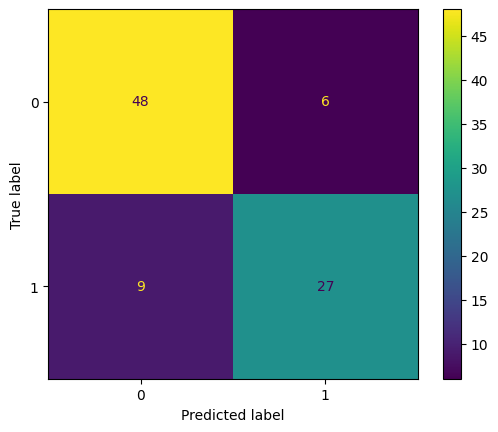

In [61]:
cm = confusion_matrix(y_test, y_pred, labels=grid_model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_model_knn.classes_)
disp.plot()
plt.show()

In [62]:
# Make prediction with train data - SupportVectorMachine
start = time.time()
from sklearn.svm import SVC

X = train_data_clean.drop('Survived', axis=1)
y = train_data_clean['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
svc_model = SVC()
# Parameters to try
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
grid = dict(kernel=kernel,C=C,gamma=gamma)
grid_model_svc = GridSearchCV(svc_model, param_grid=grid)
grid_model_svc.fit(scaled_X_train, y_train)
end = time.time()
print('duration:', end - start)

duration: 2.1466147899627686


In [63]:
grid_model_svc.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [64]:
y_pred = grid_model_svc.predict(scaled_X_test)
accuracy_score(y_test, y_pred)

0.8333333333333334

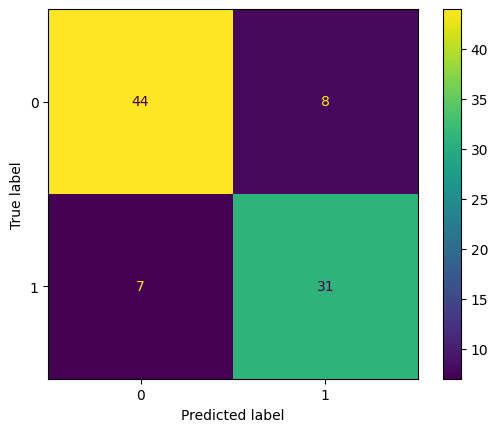

In [65]:
cm = confusion_matrix(y_test, y_pred, labels=grid_model_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_model_svc.classes_)
disp.plot()
plt.show()

In [66]:
# Make prediction with train data - RandomForest
start = time.time()
from sklearn.ensemble import RandomForestClassifier

X = train_data_clean.drop('Survived', axis=1)
y = train_data_clean['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
randomforest_model = RandomForestClassifier()
# Parameters to try
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
grid_model_randomforest = GridSearchCV(randomforest_model, param_grid=grid)
grid_model_randomforest.fit(scaled_X_train, y_train)
end = time.time()
print('duration:', end - start)

duration: 37.3503098487854


In [67]:
grid_model_randomforest.best_params_

{'max_features': 'sqrt', 'n_estimators': 1000}

In [68]:
y_pred = grid_model_randomforest.predict(scaled_X_test)
accuracy_score(y_test, y_pred)

0.7222222222222222

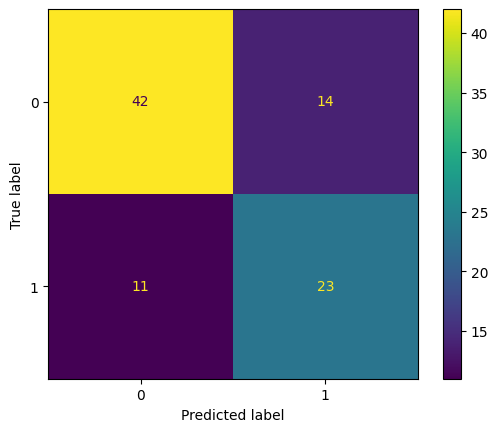

In [69]:
cm = confusion_matrix(y_test, y_pred, labels=grid_model_randomforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_model_randomforest.classes_)
disp.plot()
plt.show()

In [70]:
# Clean test data
test_data = pd.read_csv('test.csv')

In [71]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [72]:
# Fill in missing Age
test_data['Salutation'] = test_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_data['Age'] = train_data.groupby('Salutation')['Age'].transform(lambda x: x.fillna(x.mean()))

# Fill in missing Fare
test_data['Fare'] = train_data.groupby(['Pclass', 'Embarked'])['Fare'].transform(lambda x: x.fillna(x.mean()))

# Fill in missing Cabin
test_data['Cabin'].fillna('Na')

0        Na
1        Na
2        Na
3        Na
4        Na
       ... 
413      Na
414    C105
415      Na
416      Na
417      Na
Name: Cabin, Length: 418, dtype: object

In [73]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Salutation   418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [74]:
test_data['CabinGroup'] = test_data['Cabin'].astype(str).str[0]

test_data_clean = test_data.drop(['Name', 'PassengerId', 'Ticket', 'Cabin', 'Salutation'], axis=1)
test_data_clean['Family'] = test_data_clean['SibSp'] + test_data_clean['Parch']
test_data_clean[['CabinNumber', 'dummy']] = test_data['Cabin'].astype(str).str.split(" ", n=1, expand=True)
test_data_clean['CabinNumber'] = test_data_clean['CabinNumber'].astype(str).str[1:]
test_data_clean['CabinNumber'].replace({'an': 0.0}, inplace=True)
test_data_clean['CabinNumber'].replace({'': 0.0}, inplace=True)
test_data_clean['CabinGroup'].replace({'n': 'NaN'}, inplace=True)
test_data_clean = test_data_clean.drop(['dummy'], axis=1)
test_data_clean['CabinNumber'] = test_data_clean['CabinNumber'].astype(float)
test_data_clean =  pd.get_dummies(test_data_clean, drop_first=True)
test_data_clean['CabinGroup_T'] = False

In [75]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,CabinGroup
0,892,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.2500,NaN,Q,Mr,n
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,363272,71.2833,NaN,S,Mrs,n
2,894,2,"Myles, Mr. Thomas Francis",male,26.0,0,0,240276,7.9250,NaN,Q,Mr,n
3,895,3,"Wirz, Mr. Albert",male,35.0,0,0,315154,53.1000,NaN,S,Mr,n
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.0,1,1,3101298,8.0500,NaN,S,Mrs,n


In [76]:
test_data_clean.head()

,Pclass,Age,SibSp,Parch,Fare,Family,CabinNumber,Sex_male,Embarked_Q,Embarked_S,CabinGroup_B,CabinGroup_C,CabinGroup_D,CabinGroup_E,CabinGroup_F,CabinGroup_G,CabinGroup_NaN,CabinGroup_T
0,3,22.0,0,0,7.2500,0,0.0,True,True,False,False,False,False,False,False,False,True,False
1,3,38.0,1,0,71.2833,1,0.0,False,False,True,False,False,False,False,False,False,True,False
2,2,26.0,0,0,7.9250,0,0.0,True,True,False,False,False,False,False,False,False,True,False
3,3,35.0,0,0,53.1000,0,0.0,True,False,True,False,False,False,False,False,False,True,False
4,3,35.0,1,1,8.0500,2,0.0,False,False,True,False,False,False,False,False,False,True,False


In [77]:
train_data_clean.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family',
       'CabinNumber', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'CabinGroup_B',
       'CabinGroup_C', 'CabinGroup_D', 'CabinGroup_E', 'CabinGroup_F',
       'CabinGroup_G', 'CabinGroup_NaN', 'CabinGroup_T'],
      dtype='object')

In [78]:
test_data_clean.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family', 'CabinNumber',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'CabinGroup_B', 'CabinGroup_C',
       'CabinGroup_D', 'CabinGroup_E', 'CabinGroup_F', 'CabinGroup_G',
       'CabinGroup_NaN', 'CabinGroup_T'],
      dtype='object')

In [79]:
# Make prediction with test data
scaled_test_data_clean = scaler.transform(test_data_clean)
predictions = grid_model_ridge.predict(scaled_test_data_clean)

In [80]:
# Submit
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
# print(output)

Your submission was successfully saved!
